In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
main_df = pd.read_excel("CaseStudyData.xlsx")

In [ ]:
og_df = main_df.copy()

EDA

In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247172 entries, 0 to 247171
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Property ID  247172 non-null  object        
 1   Location     247172 non-null  object        
 2   Size         244701 non-null  float64       
 3   Bedrooms     238769 non-null  float64       
 4   Bathrooms    240499 non-null  float64       
 5   Year Built   234567 non-null  float64       
 6   Condition    236544 non-null  object        
 7   Type         247172 non-null  object        
 8   Date Sold    247172 non-null  datetime64[ns]
 9   Price        241735 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 18.9+ MB


In [ ]:
main_df.describe()

,Size,Bedrooms,Bathrooms,Year Built,Date Sold,Price
count,244701.000000,238769.000000,240499.000000,234567.000000,247172,2.417350e+05
mean,2402.547664,3.000457,2.002823,1961.429191,2022-07-02 05:00:11.127473664,4.660883e+05
min,800.000000,1.000000,1.000000,1900.000000,2020-01-01 00:00:00,2.600000e+04
25%,1603.000000,2.000000,1.000000,1931.000000,2021-04-02 00:00:00,3.000000e+05
50%,2404.000000,3.000000,2.000000,1961.000000,2022-07-03 00:00:00,4.170000e+05
75%,3203.000000,4.000000,3.000000,1992.000000,2023-10-02 00:00:00,5.770000e+05
max,3999.000000,5.000000,3.000000,2023.000000,2024-12-31 00:00:00,2.223000e+06
std,923.418566,1.415088,0.816616,35.752638,NaN,2.315026e+05


In [ ]:
main_df.shape

(247172, 10)

In [ ]:
(main_df.isna().sum() / len(main_df)) * 100

,0
Property ID,0.000000
Location,0.000000
Size,0.999709
Bedrooms,3.399657
Bathrooms,2.699739
Year Built,5.099688
Condition,4.299840
Type,0.000000
Date Sold,0.000000
Price,2.199683


In [ ]:
main_df.dropna(inplace=True)

In [ ]:
main_df.duplicated().sum()

np.int64(0)

In [ ]:
main_df.shape

(234567, 10)

In [ ]:
main_df.dtypes

,0
Property ID,object
Location,object
Size,float64
Bedrooms,float64
Bathrooms,float64
Year Built,float64
Condition,object
Type,object
Date Sold,datetime64[ns]
Price,float64


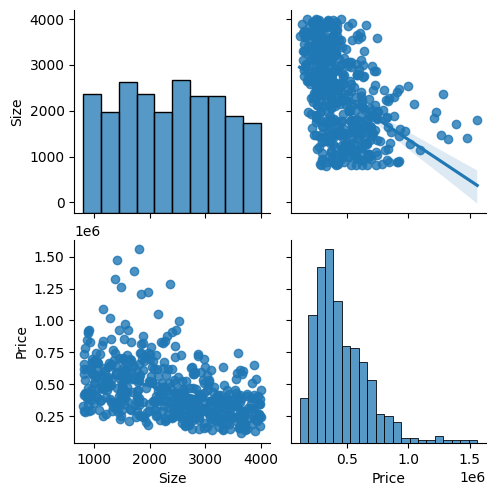

In [ ]:
cols = ["Size", "Price"]
sns.pairplot(main_df[cols].sample(500) ,kind='reg')

<Axes: xlabel='Size', ylabel='Price'>

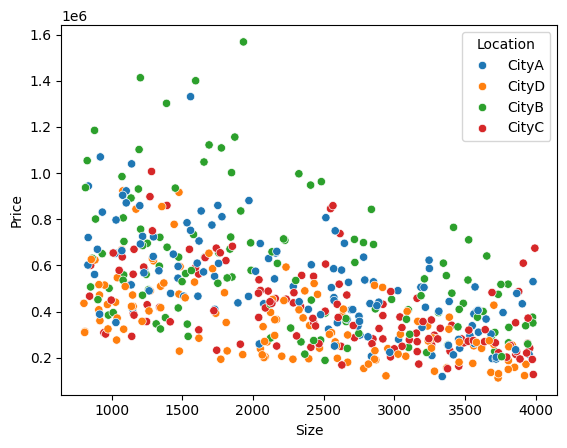

In [ ]:
sns.scatterplot(data =main_df.sample(500) ,x="Size" ,y='Price'  ,hue='Location')

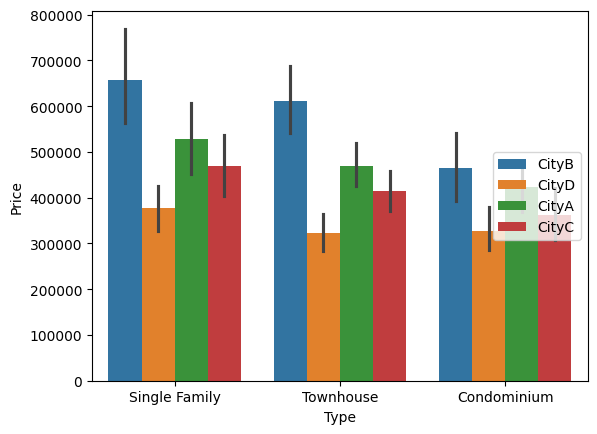

In [ ]:
# sns.scatterplot(data =main_df.sample(500) ,x="Size" ,y='Price'  ,hue='Type')
sns.barplot(data =main_df.sample(500) ,x="Type" ,y='Price'  ,hue='Location')
plt.legend(loc='right')
plt.show()

<Axes: ylabel='Price'>

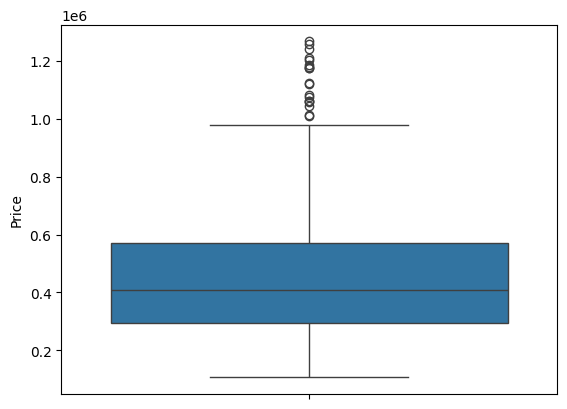

In [ ]:
sns.boxplot(data=main_df.sample(500), y='Price')

<Axes: ylabel='Size'>

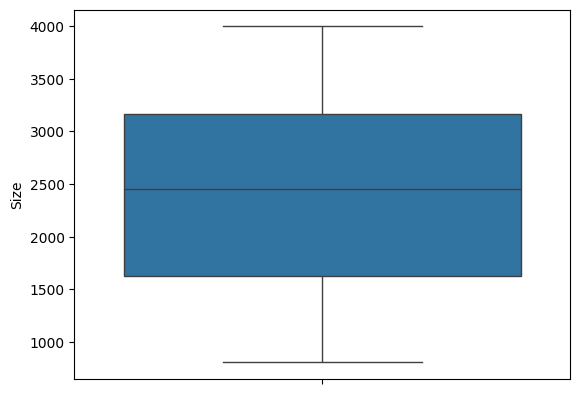

In [ ]:
sns.boxplot(data=main_df.sample(500), y='Size')

Adding new feature Based on the Old one and removing useless features

In [ ]:
main_df.drop("Property ID",axis=1,inplace=True)

In [ ]:
current_year = 2026
main_df["House_Age"] = current_year - main_df["Year Built"]
# main_df.drop('Year Built',inplace=True,axis=1)
main_df.sample()

,Location,Size,Bedrooms,Bathrooms,Year Built,Condition,Type,Date Sold,Price,House_Age
215700,CityD,2541.0,3.0,1.0,1921.0,Good,Townhouse,2020-08-08,278000.0,105.0


In [ ]:
main_df["Year_sold"] = main_df["Date Sold"].dt.year
main_df["month_sold"] = main_df["Date Sold"].dt.month
main_df.drop('Date Sold',inplace=True,axis=1)
main_df.sample()

,Location,Size,Bedrooms,Bathrooms,Year Built,Condition,Type,Price,House_Age,Year_sold,month_sold
146738,CityD,2139.0,3.0,2.0,2012.0,Poor,Condominium,217000.0,14.0,2022,6


In [ ]:
main_df['Age_when_sold'] = main_df['Year_sold'] - main_df['Year Built']
main_df.sample(5)

,Location,Size,Bedrooms,Bathrooms,Year Built,Condition,Type,Price,House_Age,Year_sold,month_sold,Age_when_sold
184111,CityA,3234.0,3.0,2.0,2014.0,Fair,Townhouse,318000.0,12.0,2023,6,9.0
86285,CityB,3900.0,4.0,3.0,1906.0,Good,Single Family,974000.0,120.0,2024,11,118.0
210341,CityC,1693.0,5.0,3.0,1912.0,Good,Townhouse,1083000.0,114.0,2024,11,112.0
123891,CityA,1670.0,4.0,1.0,1984.0,Fair,Condominium,599000.0,42.0,2024,6,40.0
10904,CityC,2930.0,1.0,2.0,2010.0,Good,Single Family,280000.0,16.0,2021,5,11.0


In [ ]:
main_df['Space_Per_Bed'] = main_df['Size'] / main_df['Bedrooms']
main_df.sample(5)


,Location,Size,Bedrooms,Bathrooms,Year Built,Condition,Type,Price,House_Age,Year_sold,month_sold,Age_when_sold,Space_Per_Bed
74373,CityB,1789.0,2.0,1.0,2019.0,Fair,Single Family,987000.0,7.0,2024,11,5.0,894.5
229946,CityD,3682.0,5.0,1.0,2013.0,New,Townhouse,319000.0,13.0,2021,1,8.0,736.4
484,CityD,1881.0,3.0,1.0,1921.0,Fair,Single Family,456000.0,105.0,2023,1,102.0,627.0
118725,CityB,3313.0,1.0,3.0,1923.0,Fair,Condominium,388000.0,103.0,2023,8,100.0,3313.0
191482,CityB,3852.0,4.0,1.0,1914.0,Poor,Townhouse,279000.0,112.0,2023,2,109.0,963.0


In [ ]:
loc_mean = main_df.groupby("Location")["Price"].mean()
main_df["Average_price_location"] = main_df["Location"].map(loc_mean)


In [ ]:
main_df.sample(5)

,Location,Size,Bedrooms,Bathrooms,Year Built,Condition,Type,Price,House_Age,Year_sold,month_sold,Age_when_sold,Space_Per_Bed,Average_price_location
64413,CityA,3119.0,5.0,3.0,1964.0,Fair,Single Family,319000.0,62.0,2020,10,56.0,623.800000,490537.430111
158846,CityB,3580.0,1.0,3.0,1952.0,Fair,Townhouse,348000.0,74.0,2022,12,70.0,3580.000000,575911.381765
89300,CityB,1561.0,3.0,2.0,1949.0,New,Condominium,665000.0,77.0,2021,4,72.0,520.333333,575911.381765
77724,CityC,2750.0,4.0,3.0,1973.0,Good,Single Family,653000.0,53.0,2024,2,51.0,687.500000,440601.929217
12729,CityB,818.0,2.0,1.0,1924.0,Fair,Single Family,367000.0,102.0,2020,5,96.0,409.000000,575911.381765


encoding of the Categorical Data

In [ ]:
main_df['Condition'].value_counts()

,count
Condition,
Good,93840
Fair,70598
Poor,46844
New,23285


In [ ]:
order = ['Poor','Fair','Good',"New"]

Oencoder = OrdinalEncoder(categories=[order])

In [ ]:
main_df["Condition_encoded"] = Oencoder.fit_transform(main_df[["Condition"]])

In [ ]:
main_df.drop("Condition",axis=1,inplace=True)
main_df.sample(2)

,Location,Size,Bedrooms,Bathrooms,Year Built,Type,Price,House_Age,Year_sold,month_sold,Age_when_sold,Space_Per_Bed,Average_price_location,Condition_encoded
243932,CityA,2653.0,2.0,2.0,1922.0,Townhouse,648000.0,104.0,2023,8,101.0,1326.500000,490537.430111,3.0
246842,CityC,3695.0,3.0,2.0,1912.0,Townhouse,277000.0,114.0,2023,10,111.0,1231.666667,440601.929217,0.0


In [ ]:
ohe = OneHotEncoder(sparse_output=False,handle_unknown="ignore").set_output(transform="pandas")

In [ ]:
encoded_data = ohe.fit_transform(main_df[["Type",'Location']])
encoded_data.sample()

,Type_Condominium,Type_Single Family,Type_Townhouse,Location_CityA,Location_CityB,Location_CityC,Location_CityD
44277,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
main_df.drop(["Type",'Location'],axis=1,inplace=True)
main_df = pd.concat([main_df,encoded_data],axis=1)

In [ ]:
main_df.sample()

,Size,Bedrooms,Bathrooms,Year Built,Price,House_Age,Year_sold,month_sold,Age_when_sold,Space_Per_Bed,Average_price_location,Condition_encoded,Type_Condominium,Type_Single Family,Type_Townhouse,Location_CityA,Location_CityB,Location_CityC,Location_CityD
71527,1650.0,2.0,1.0,1972.0,989000.0,54.0,2023,10,51.0,825.0,440601.929217,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
main_df.corr()['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Year_sold,0.494199
Condition_encoded,0.474733
Average_price_location,0.341637
Location_CityB,0.273045
Bedrooms,0.162526
Type_Single Family,0.120228
month_sold,0.100707
Location_CityA,0.061298
Bathrooms,0.057926


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, learning_rate=0.2, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, learning_rate=0.2, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=50, learning_rate=0.3, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),

}

prediction without feature engineering


feature removal

In [ ]:
# main_df.drop(["Year Built",'Age_when_sold'],axis=1,inplace=True)

<Axes: >

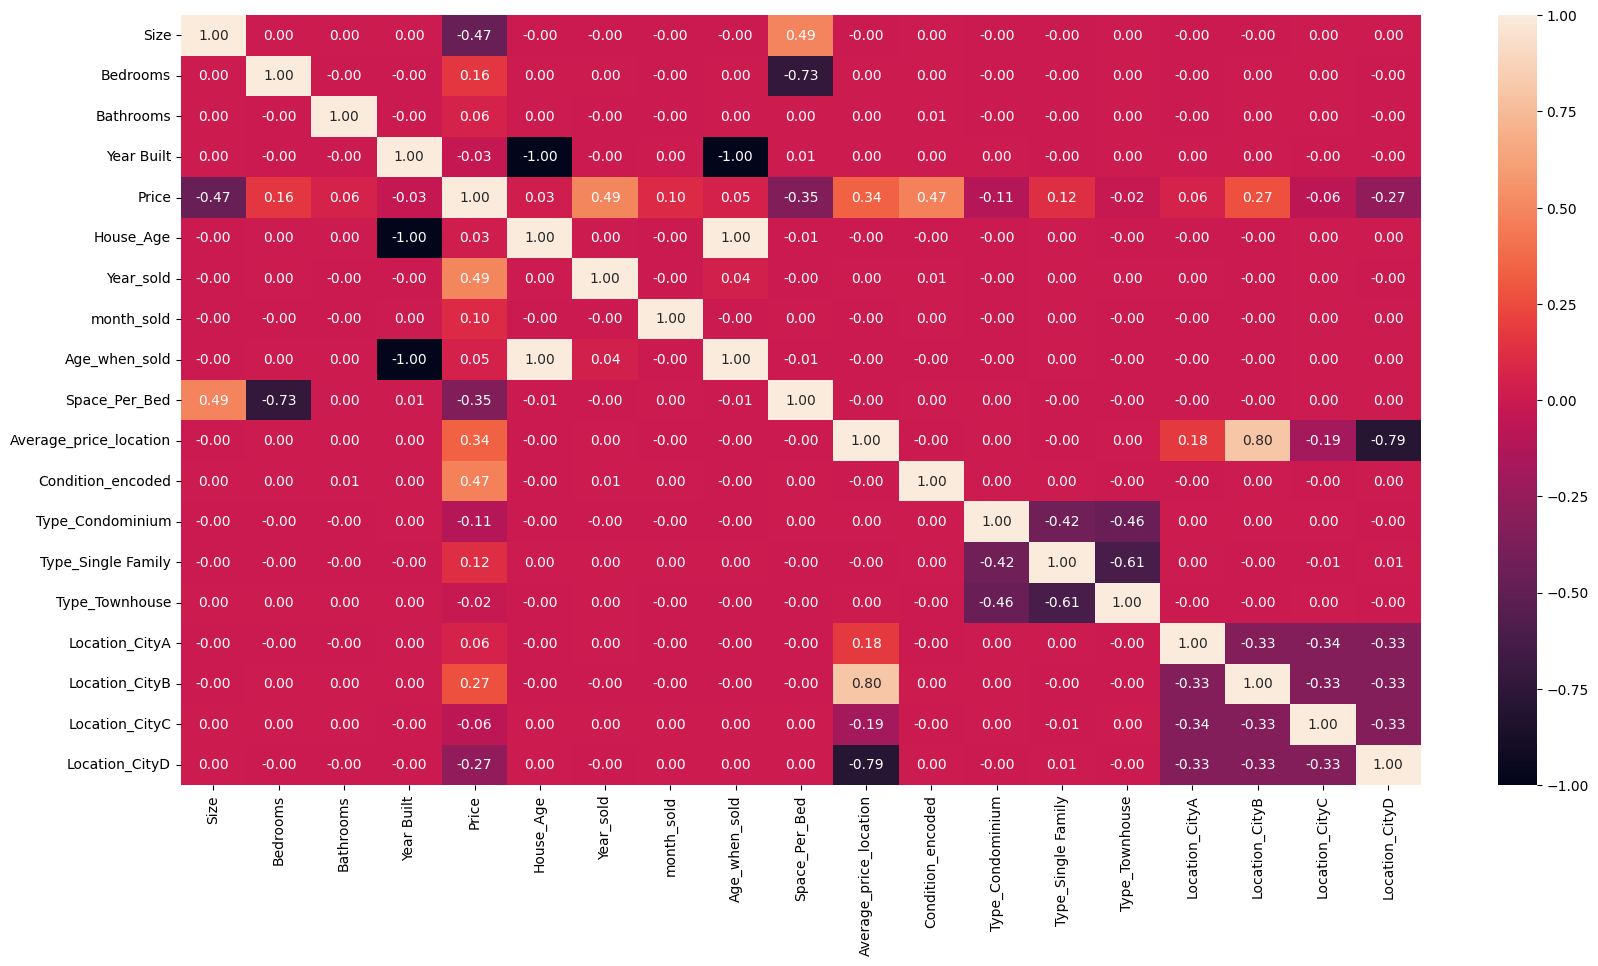

In [ ]:
cor = main_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,fmt='.2f')

In [ ]:
main_df.drop(['Bathrooms','Age_when_sold','House_Age','Year Built','Average_price_location'],axis=1,inplace=True)

In [ ]:
main_df.drop(['Space_Per_Bed'],axis=1,inplace=True)

Training basic data with no feature engineering

In [ ]:
og_df.drop("Property ID",axis=1,inplace=True)
og_df.sample()

,Location,Size,Bedrooms,Bathrooms,Year Built,Condition,Type,Date Sold,Price
95669,CityD,2715.0,1.0,3.0,1988.0,Poor,Condominium,2022-01-10,168000.0


In [ ]:
og_df.dropna(inplace=True)
og_df["Condition_encoded"] = Oencoder.fit_transform(og_df[["Condition"]])
og_df.drop("Condition",axis=1,inplace=True)
og_df.sample(2)

,Location,Size,Bedrooms,Bathrooms,Year Built,Type,Date Sold,Price,Condition_encoded
139382,CityD,2874.0,3.0,2.0,1953.0,Condominium,2023-06-18,324000.0,2.0
156942,CityC,1448.0,5.0,2.0,1916.0,Townhouse,2020-04-21,292000.0,0.0


In [ ]:
og_df.drop(["Type",'Location'],axis=1,inplace=True)
og_df = pd.concat([og_df,encoded_data],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
og_df.drop('Date Sold',axis=1,inplace=True)
X = og_df.drop("Price",axis=1)
y = og_df["Price"]
scaler = StandardScaler()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.1)

In [ ]:
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_test_scaled= pd.DataFrame(X_test_scaled,columns=X.columns)

In [ ]:
X_scaled.shape, y_train.shape

((211110, 12), (211110,))

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

results = []


for name, model in models.items():

    model.fit(X_scaled, y_train)


    predictions = model.predict(X_test_scaled)


    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)


    results.append({"Model": name, "R2 Score": r2, "MAE": mae})


results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print(results_df)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.841e+14, tolerance: 1.132e+12
  model = cd_fast.enet_coordinate_descent(


               Model  R2 Score            MAE
7            XGBoost  0.648093  102256.805331
6  Gradient Boosting  0.647025  102521.921002
5      Random Forest  0.642121  103079.011729
4      Decision Tree  0.631745  104196.596365
1              Ridge  0.605494  109205.962805
0  Linear Regression  0.605494  109206.059242
2              Lasso  0.605494  109206.037641
3         ElasticNet  0.604728  108423.846161
9                KNN  0.580519  108927.228546
8           AdaBoost  0.511228  127796.177453


Model training with Date , on which feature engineering is performed


In [ ]:
X = main_df.drop("Price",axis=1)
y = main_df["Price"]
scaler = StandardScaler()



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.1)

In [ ]:
X_scaled = scaler.fit_transform(X_train)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X.columns)

In [ ]:
X_scaled.shape, y_train.shape

((211110, 12), (211110,))

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

results = []


for name, model in models.items():

    model.fit(X_scaled, y_train)


    predictions = model.predict(X_test_scaled)

    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)


    results.append({"Model": name, "R2 Score": r2, "MAE": mae})

results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print(results_df)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.849e+13, tolerance: 1.132e+12
  model = cd_fast.enet_coordinate_descent(


               Model  R2 Score           MAE
7            XGBoost  0.985497  21851.967270
9                KNN  0.982332  23890.932344
6  Gradient Boosting  0.967367  30429.727049
5      Random Forest  0.959082  35667.883549
4      Decision Tree  0.947499  40175.400886
1              Ridge  0.855403  62030.524470
0  Linear Regression  0.855403  62030.648213
2              Lasso  0.855403  62030.620420
3         ElasticNet  0.853645  61162.603818
8           AdaBoost  0.741178  95413.813020


SVR

In [ ]:
# SVR = SVR(kernel='rbf', C=1.0)

In [ ]:
# SVR.fit(X_scaled, y_train)

In [ ]:
# predictions = model.predict(X_test_scaled)

In [ ]:
# r2_score(y_test, predictions)

In [ ]:
# mean_absolute_error(y_test, predictions)

<Axes: xlabel='R2 Score', ylabel='Model'>

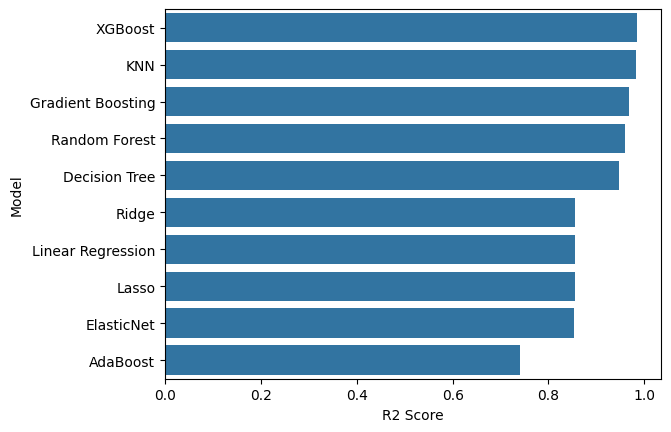

In [ ]:
sns.barplot(x=results_df["R2 Score"],y=results_df["Model"])

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(models['XGBoost'],X_scaled, y_train, cv=5, scoring='r2')

print(f"Mean R2 score: {scores.mean():.2f}")

Mean R2 score: 0.99


Hyper parameter tuning with the best model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_dist = {
    'n_estimators': [100, 250, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 6, 9, 12],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
   }




In [ ]:
random_search = RandomizedSearchCV(
    estimator=models['XGBoost'],
    param_distributions =  param_dist,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42
)


In [ ]:
random_search.fit(X_scaled, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=50,
                                          n_jobs=None, num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 6, 9, 12],
                                        'n_estimators': [100, 250, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
best_params_ = random_search.best_params_

In [ ]:
y_pred = random_search.predict(X_test_scaled)

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
mean_absolute_error(y_test, y_pred)

20589.748215817774

In [ ]:
r2

0.9872596262577691

Final Model With best params

In [ ]:
final_model = random_search.best_estimator_
final_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
cv_scores = cross_val_score(
    final_model,
    X_train,
    y_train,
    cv=5,
    scoring="r2"
)

print("CV R² Scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())


CV R² Scores: [0.98729423 0.98728281 0.98705006 0.98745693 0.98735123]
Mean CV R²: 0.9872870526674905


In [ ]:
y_pred = final_model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.9872596262577691

In [ ]:
import joblib


joblib.dump(final_model, 'house_price_model.pkl')


['house_price_model.pkl']

In [ ]:
joblib.dump(X_train.columns, "model_columns.pkl")



['model_columns.pkl']

In [ ]:
col = joblib.load('model_columns.pkl')

In [ ]:
col

Index(['Size', 'Bedrooms', 'Year_sold', 'month_sold', 'Condition_encoded',
       'Type_Condominium', 'Type_Single Family', 'Type_Townhouse',
       'Location_CityA', 'Location_CityB', 'Location_CityC', 'Location_CityD'],
      dtype='object')

Using  LightGBM

In [ ]:
import lightgbm as lgb
model = lgb.LGBMRegressor(
    n_estimators=250,
    learning_rate=0.05,

)

# model.fit(X_train, y_train)


In [ ]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions = param_dist,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42
)


In [ ]:
random_search.fit(X_scaled, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 306
[LightGBM] [Info] Number of data points in the train set: 211110, number of used features: 12
[LightGBM] [Info] Start training from score 465952.588698


RandomizedSearchCV(cv=5,
                   estimator=LGBMRegressor(learning_rate=0.05,
                                           n_estimators=250),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 6, 9, 12],
                                        'n_estimators': [100, 250, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
cv_scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=5,
    scoring="r2"
)
print("CV R² Scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 168888, number of used features: 12
[LightGBM] [Info] Start training from score 466099.971579
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 168888, number of used features: 12
[LightGBM] [Info] Start training from score 466241.130216
[LightGBM] [Warnin

In [ ]:
y_pred = random_search.predict(X_test_scaled)

In [ ]:
mean_absolute_error(y_test, y_pred)

20741.8273737606

polynomial